# DA 320 
Assignment: Detecting Outliers

Student: Jennifer Roria

Source: Basis of code provided by Professor Spence - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb

Date: October, 27 2023

In [22]:
#import libraries

import urllib3
import certifi

Retrieve Connection from a JSON File

In [23]:
import json

#Demonstration of how to load a file that contains secrets without accidentally leaking confidential info
with open('/Users/jennsmacbook/Downloads/secrets.json') as f:
    data = json.load(f)
    
secret_key = data['mongoDB']

#Print the length of the secret key. 
print(f"My secret key is {len(secret_key)} characters in length.")



My secret key is 100 characters in length.


Connect to a MongoDB Server from a Database

In [24]:
# I installed pypmongo and certifi through terminal
import pymongo
import certifi
import pandas as pd

# Connect to the database 
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". 
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['METACRITIC ', 'IMBD']


Fetch IMDB Collection from a MongoDB Server

In [25]:
# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["IMBD"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652b81f6e5f87fac42d4650e,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,652b81f6e5f87fac42d46518,11354364,Reveal,130.0,4.6,1508,NaN,11/29/2019,NaN,NaN,NaN,"Mystery, Thriller","Aadhya Aaradhana, Advith Narayanankutty, Sudha...",Murali .S.V.,Jayasudha K.,Sri Manjunatha Cine Combines
2,652b81f6e5f87fac42d46512,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."
3,652b81f6e5f87fac42d4650f,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
4,652b81f6e5f87fac42d46515,77713,I Spit on Your Grave,101.0,5.6,28381,TV-MA,5/23/1978,650000.0,NaN,NaN,"Horror, Thriller","Camille Keaton, Eron Tabor, Richard Pace, Anth...",Meir Zarchi,"Meir Zarchi, Joseph Zbeda",Barquel Creations


Converting data

In [26]:
# Transform and standardize the columns
imdb.release_date=pd.to_datetime(imdb.release_date,errors = 'coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime=pd.to_numeric(imdb.runtime,errors='coerce')

# cheking result
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652b81f6e5f87fac42d4650e,77631,Grease,110.0,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,652b81f6e5f87fac42d46518,11354364,Reveal,130.0,4.6,1508,NaN,2019-11-29,NaN,NaN,NaN,"Mystery, Thriller","Aadhya Aaradhana, Advith Narayanankutty, Sudha...",Murali .S.V.,Jayasudha K.,Sri Manjunatha Cine Combines
2,652b81f6e5f87fac42d46512,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",1978-07-27,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."
3,652b81f6e5f87fac42d4650f,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
4,652b81f6e5f87fac42d46515,77713,I Spit on Your Grave,101.0,5.6,28381,TV-MA,1978-05-23,650000.0,NaN,NaN,"Horror, Thriller","Camille Keaton, Eron Tabor, Richard Pace, Anth...",Meir Zarchi,"Meir Zarchi, Joseph Zbeda",Barquel Creations


Plotting Currency Numbers 

In [27]:
from matplotlib import pyplot

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

Plotting Runtime Against Release Date

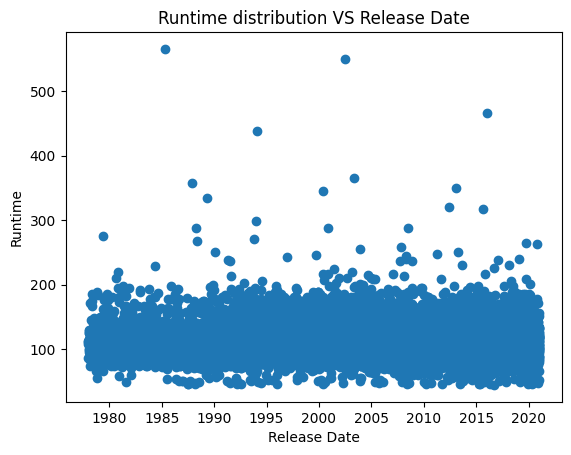

In [28]:
pyplot.title('Runtime distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imdb['release_date'], imdb['runtime'])
pyplot.show()

Top Outliers for Runtime

In [ ]:
#Identify the top outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
1548,652b81f6e5f87fac42d46c34,90015,Shoah,566.0,8.7,9396,Not Rated,1985-04-30,NaN,NaN,NaN,"Documentary, History, War","Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann,", , , ,","British Broadcasting Corporation, Historia, Le..."
8630,652b81f8e5f87fac42d487a1,389448,Tie Xi Qu: West of the Tracks,551.0,8.2,1163,None,2002-06-21,NaN,NaN,NaN,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ..."
22504,652b81fce5f87fac42d4bde5,5275892,O.J.: Made in America,467.0,8.9,19642,TV-MA,2016-01-22,NaN,NaN,NaN,"Documentary, Biography, Crime, History","Kareem Abdul-Jabbar, Mike Albanese, Muhammad A...",Ezra Edelman,"John Dahl, Ryan Dilts, Ezra Edelman, Cristina ...","ESPN Films, Laylow Films"
4539,652b81f7e5f87fac42d477dc,111341,Satantango,439.0,8.3,10916,Not Rated,1994-02-08,NaN,NaN,NaN,Drama,"Mihály Vig, Putyi Horváth, László feLugossy, É...",Béla Tarr,"György Fehér, Joachim von Vietinghoff, Ruth Wa...","Mozgókép Innovációs Társulás és Alapítvány, Vo..."
9443,652b81f9e5f87fac42d48945,346336,The Best of Youth,366.0,8.5,21923,R::(part 1),2003-05-20,NaN,NaN,2799773.0,"Drama, Romance","Luigi Lo Cascio, Alessio Boni, Adriana Asti, S...",Marco Tullio Giordana,"Angelo Barbagallo, Gianfranco Barbagallo, Dona...","BiBi Film, Rai Fiction, Film Commission Torino..."


Plotting Budget Against Release Date

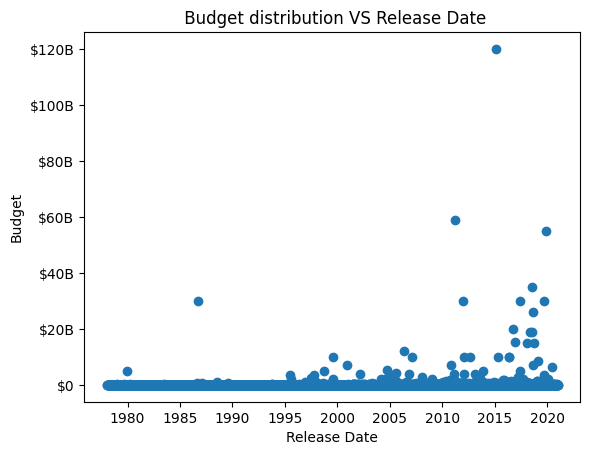

In [ ]:
pyplot.title(' Budget distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

Top outliers for budget

In [ ]:
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
21839,652b81fbe5f87fac42d4b945,3921314,Muhammad: The Messenger of God,162.0,7.2,10764,None,2015-02-01,1.200000e+11,NaN,NaN,"Biography, Drama, History","Mahdi Pakdel, Sareh Bayat, Mina Sadati, Ali Re...",Majid Majidi,"Muhammad Mehdi Heidarian, Majid Majidi, Farzad...",Nourtaban Film Industry
17379,652b81fae5f87fac42d4a8f4,3131744,Deportees 3,112.0,2.4,1631,NaN,2011-03-17,5.900000e+10,NaN,NaN,"Action, Comedy, Drama","Akbar Abdi, Armin Alavi, Kamand Amirsoleimani,...",Masoud Dehnamaki,"Saeed Bagheri, Masoud Dehnamaki, Mohamad Reza ...",", , , ,"
28337,652b81fde5f87fac42d4d35c,11296132,The Singer,107.0,4.5,1594,NaN,2019-11-06,5.500000e+10,NaN,NaN,"Comedy, Drama, Music, Romance","Ziba Hajian, Parviz Parastui, Elnaz Shakerdoos...",Mostafa Kiayee,"Shahin Fardtombekiyan, Mostafa Kiayee","Filmiran, HA International, Karen Film"
25647,652b81fce5f87fac42d4ca8a,8116428,Along With the Gods: The Last 49 Days,142.0,7.1,7171,Not Rated,2018-08-01,3.500000e+10,NaN,NaN,"Action, Drama, Fantasy","Ha Jung-woo, Ju Ji-Hoon, Hyang-gi Kim, Ma Dong...",Yong-hwa Kim,"Ji-sun Choi, Won Dong-Yeon, Yong-hwa Kim, Daes...","Dexter Studios, Realies Pictures"
27238,652b81fde5f87fac42d4cf7d,8237172,Gundala,123.0,6.1,4892,TV-14,2019-08-29,3.000000e+10,NaN,NaN,"Action, Adventure, Drama, Sci-Fi","Abimana Aryasatya, Tara Basro, Bront Palarae, ...",Joko Anwar,"Wim Berlinawan, Andi Boediman, Bismarka Kurnia...","Screenplay Films, Bumilangit Studios, Legacy P..."


Outliers in Runtime:
Some outliers may represent movies that are actually episodes combined together, while others could be exceptionally long documentary films. To identify these outliers, consider adding a filter that checks for the presence of episodes and filters by movie type.


Outliers in Budget:
To ensure proper budget comparison, consider adding a filter based on Currency Code. Create an additional field that allows for conversion to US dollars according to the release year, facilitating a more accurate budget analysis.


Conclusion:
Adding these filters and conversions can provide more insight into outliers in runtime and budget, helping to identify whether the outliers are due to certain movie types or currency differences over time.